In [1]:
import torch
torch.__version__

'1.0.1'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from torch.autograd import Variable


## PyTorch로 첫 번째 신경망 만들기

학습 데이터를 목적 변수(출력 배열)에 매핑하는 것을 학습하는 신경망을 만들어 볼 것입니다. 우리는 주문형 비디오 서비스를 제공하는 Wondemovies라는 큰 온라인 회사에서 일한다고 가정하겠습니다. 플랫폼에서 영화를 보는 사용자가 보낸 평균 시간을 피처로하는 학습 데이터셋을 갖고 있습니다. 이 학습 데이터셋으로 다음 주에 사용자가 플랫폼에 얼마나 많은 시간을 소비할 것인지 예측하고 싶습니다. 이것은 상상의 유스 케이스입니다. 너무 많이 고민할 필요는 없습니다. 이러한 솔루션을 구축하기 위해서 다음과 같은 작업을 수행합니다. 

1. 데이터 준비 : **get_data()** 함수는 입력과 출력 데이터로 구성된 Tensor 배열을 제공합니다. 
2. 학습 파라미터 생성 : **get_weights()** 함수는 임의의 수를 포함하는 Tensor를 제공합니다. 이 임의의 수는 이 문제의 해법을 구하기 위해서 최적화 됩니다. 
3. 네트워크 모델 : **simple_network()** 는 선형 규칙을 적용하고 가중치에 입력 데이터를 곱하고 바이어스 항 (y = Wx + b)을 더하여 입력 데이터에 대한 출력을 생성합니다
4. 오차 : **loss_fn()** 함수는 모델의 얼마나 좋은지에 대한 정보를 제공합니다. 
5. 옵티마이저 : **optimize()** 함수는 초기에 생성 된 임의의 가중치를 조정하여 모델이 목표 값을보다 정확하게 계산하도록합니다.

In [3]:
# 학습 데이터
def get_data():
    train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
    train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
    dtype = torch.FloatTensor
    X = Variable(torch.from_numpy(train_X).type(dtype),requires_grad=False).view(17,1)
    y = Variable(torch.from_numpy(train_Y).type(dtype),requires_grad=False)
    return X,y

def plot_variable(x,y,z='',**kwargs):
    l = []
    for a in [x,y]:
        #1.0 업그레이드에서 필요 없는 코드
        #if type(a) == Variable:
        l.append(a.data.numpy())
    plt.plot(l[0],l[1],z,**kwargs)

def get_weights():
    w = Variable(torch.randn(1),requires_grad = True)
    b = Variable(torch.randn(1),requires_grad=True)
    return w,b

def simple_network(x):
    y_pred = torch.matmul(x,w)+b
    return y_pred

def loss_fn(y,y_pred):
    loss = (y_pred-y).pow(2).sum()
    for param in [w,b]:
        if not param.grad is None: param.grad.data.zero_()
    loss.backward()
    return loss.data


def optimize(learning_rate):
    w.data -= learning_rate * w.grad.data
    b.data -= learning_rate * b.grad.data

learning_rate = 1e-4

In [4]:
x,y = get_data()               # x - 학습 데이터, y - 목적 변수(Target Variables)
w,b = get_weights()           # w,b - 학습 파라미터
for i in range(500):
    y_pred = simple_network(x) # wx + b를 계산하는 함수
    loss = loss_fn(y,y_pred)   # y와 y_pred의 차의 제곱 합을 계산
    if i % 50 == 0: 
        print(loss)
    optimize(learning_rate)    # 오차를 최소화하도록 w, b를 조정

tensor(1993.9790)
tensor(4.4364)
tensor(4.3627)
tensor(4.2920)
tensor(4.2242)
tensor(4.1592)
tensor(4.0968)
tensor(4.0369)
tensor(3.9794)
tensor(3.9242)


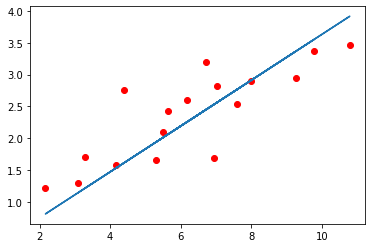

In [5]:
x_numpy = x.data.numpy()
plot_variable(x,y,'ro')
plot_variable(x,y_pred,label='Fitted line')

## Tensor 소개

### Scalar

In [6]:
x = torch.rand(10)
x.size()

torch.Size([10])

### Vector

In [7]:
temp = torch.FloatTensor([23,24,24.5,26,27.2,23.0])
temp.size()

torch.Size([6])

### Matrix

In [8]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [9]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [10]:
boston_tensor = torch.from_numpy(boston.data)
boston_tensor.size()

torch.Size([506, 13])

In [11]:
boston_tensor[:2]

tensor([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01, 6.5750e+00,
         6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02, 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01, 6.4210e+00,
         7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02, 1.7800e+01, 3.9690e+02,
         9.1400e+00]], dtype=torch.float64)

In [12]:
boston_tensor[:10,:5]

tensor([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01],
        [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01],
        [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01],
        [2.9850e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01],
        [8.8290e-02, 1.2500e+01, 7.8700e+00, 0.0000e+00, 5.2400e-01],
        [1.4455e-01, 1.2500e+01, 7.8700e+00, 0.0000e+00, 5.2400e-01],
        [2.1124e-01, 1.2500e+01, 7.8700e+00, 0.0000e+00, 5.2400e-01],
        [1.7004e-01, 1.2500e+01, 7.8700e+00, 0.0000e+00, 5.2400e-01]],
       dtype=torch.float64)

### 3d- tensor

In [13]:
from PIL import Image

panda = np.array(Image.open('../images/B09301_03_12.jpg').resize((224,224)))
panda_tensor = torch.from_numpy(panda)
panda_tensor.size()

torch.Size([224, 224, 3])

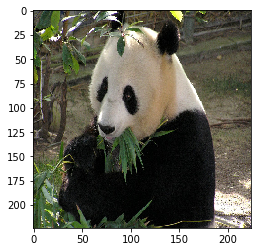

In [14]:
plt.imshow(panda);

### Tensor 자르기

In [15]:
sales = torch.FloatTensor([1000.0,323.2,333.4,444.5,1000.0,323.2,333.4,444.5])

In [16]:
sales[:5]

tensor([1000.0000,  323.2000,  333.4000,  444.5000, 1000.0000])

In [17]:
sales[:-5]

tensor([1000.0000,  323.2000,  333.4000])

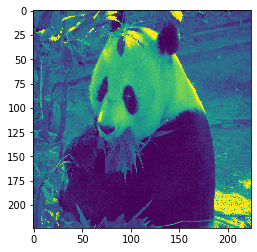

In [18]:
plt.imshow(panda_tensor[:,:,0].numpy());

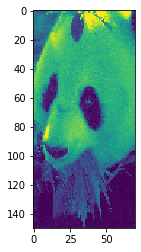

In [19]:
plt.imshow(panda_tensor[25:175,60:130,0].numpy());

### Tensor에서 특정 요소 가져오기 

In [20]:
#torch.eye(shape) produces an diagonal matrix with 1 as it diagonal #elements.
sales = torch.eye(3,3)
sales[0,1]

tensor(0.)

### 4D Tensor

In [21]:
from glob import glob
#디스크에서 고양이 이미지 읽기
data_path='/Users/vishnu/Documents/fastAIPytorch/fastai/courses/dl1/data/dogscats/train/cats/'
cats = glob(data_path+'*.jpg')
#Convert images into numpy arrays
cat_imgs = np.array([np.array(Image.open(cat).resize((224,224))) for cat in
cats[:64]])
cat_imgs = cat_imgs.reshape(-1,224,224,3)
cat_tensors = torch.from_numpy(cat_imgs)
cat_tensors.size()

torch.Size([0, 224, 224, 3])

### Tensor 덧셈 연산과 곱셈 연산

In [22]:
#Various ways you can perform tensor addition
a = torch.rand(2,2) 
b = torch.rand(2,2)
c = a + b
d = torch.add(a,b)
#덧셈 연산
a.add_(5)

#두 텐서의 곱셈

a*b
a.mul(b)
#in-place 곱셈
a.mul_(b)

tensor([[2.1284, 4.8930],
        [5.6523, 0.7722]])

### GPU 지원

In [23]:
%%time
a = torch.rand(10000,10000)
b = torch.rand(10000,10000)

a.matmul(b)

Wall time: 3.26 s


tensor([[2513.6270, 2520.6863, 2498.8462,  ..., 2502.6411, 2491.2109,
         2509.9766],
        [2491.1348, 2493.3142, 2492.3066,  ..., 2509.6899, 2462.3547,
         2496.9441],
        [2483.9502, 2508.0764, 2483.0938,  ..., 2489.6365, 2452.5403,
         2486.8499],
        ...,
        [2514.4158, 2518.3003, 2510.4912,  ..., 2518.5754, 2499.0186,
         2511.9812],
        [2494.9585, 2512.1436, 2509.7300,  ..., 2518.7698, 2501.0718,
         2499.8984],
        [2504.5352, 2503.2539, 2495.3918,  ..., 2518.8689, 2500.9631,
         2506.3440]])

- log on Mac
```
CPU times: user 1min 8s, sys: 2.44 s, total: 1min 11s
Wall time: 20.7 s    
```    

In [24]:
#GPU에 Tensor 이동
from torch import cuda 

if cuda.is_available(): 
    a = a.cuda()
    b = b.cuda()
    a.matmul(b)
#Time taken : 11.2 µs  

### Variables

In [25]:
from torch.autograd import Variable
x = Variable(torch.ones(2,2),requires_grad=True)
y = x.mean()
y.backward()
x.grad

tensor([[0.2500, 0.2500],
        [0.2500, 0.2500]])

In [26]:
x.grad_fn

In [27]:
x.data

tensor([[1., 1.],
        [1., 1.]])

In [28]:
y.grad_fn

### 신경망에 사용할 데이터 생성

In [29]:
def get_data():
    train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
    train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
    dtype = torch.FloatTensor
    X = Variable(torch.from_numpy(train_X).type(dtype),requires_grad=False).view(17,1)
    y = Variable(torch.from_numpy(train_Y).type(dtype),requires_grad=False)
    return X,y

### 학습 파라미터 생성

In [30]:
def get_weights():
    w = Variable(torch.randn(1),requires_grad = True)
    b = Variable(torch.randn(1),requires_grad=True)
    return w,b

### 신경망 구현

In [31]:
def simple_network(x):
    y_pred = torch.matmul(x,w)+b
    return y_pred

### 파이토치 신경망 구현

In [32]:
import torch.nn as nn
f = nn.Linear(17,1) # Much simpler.
f

Linear(in_features=17, out_features=1, bias=True)

### 오차 함수 구현

In [33]:
def loss_fn(y,y_pred):
    loss = (y_pred-y).pow(2).sum()
    for param in [w,b]:
        if not param.grad is None: param.grad.data.zero_()
    loss.backward()
    return loss.data[0]

### 옵티마이저 구현

In [34]:
def optimize(learning_rate):
    w.data -= learning_rate * w.grad.data
    b.data -= learning_rate * b.grad.data

## 데이터 로딩

### Dataset 정의

In [35]:
from torch.utils.data import Dataset
class DogsAndCatsDataset(Dataset):
    def __init__(self,):
        pass
    def __len__(self):
        pass
    def __getitem__(self,idx):
        pass

In [36]:
class DogsAndCatsDataset(Dataset):
    def __init__(self,root_dir,size=(224,224)):
        self.files = glob(root_dir)
        self.size = size
    def __len__(self):
        return len(self.files)
    def __getitem__(self,idx):
        img = np.asarray(Image.open(self.files[idx]).resize(self.size))
        label = self.files[idx].split('/')[-2]
        return img,label

### DogsAndCatsDataset을 순회하는 DataLoader 정의

In [37]:
from torch.utils.data import Dataset, DataLoader

#dataloader = DataLoader(DogsAndCatsDataset,batch_size=32,num_workers=2)
#for imgs , labels in dataloader:
        #학습 데이터셋에 딥러닝 네트워크 적용
#    pass